## Importing required Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings

## Importing and displaying dataset

In [49]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")

In [50]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
titanic_data.size

10692

In [52]:
titanic_data.shape

(891, 12)

In [53]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [54]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
# Dropping the column "Cabin"
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [58]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
# Replacing missing values of "Age" and "Fare" with mean values
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)
titanic_data["Fare"].fillna(titanic_data["Fare"].mean(),inplace=True)

In [60]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [62]:
# Now working using "Embarked" column
print(titanic_data['Embarked'].mode())
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)


0    S
Name: Embarked, dtype: object


In [63]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Exploratory Data analysis

In [64]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Data visuliazation

C:\Users\NavyaSravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

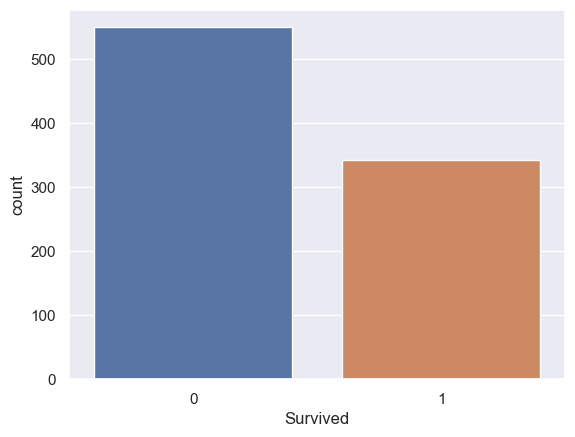

In [66]:
sns.set()
sns.countplot("Survived", data = titanic_data)

C:\Users\NavyaSravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

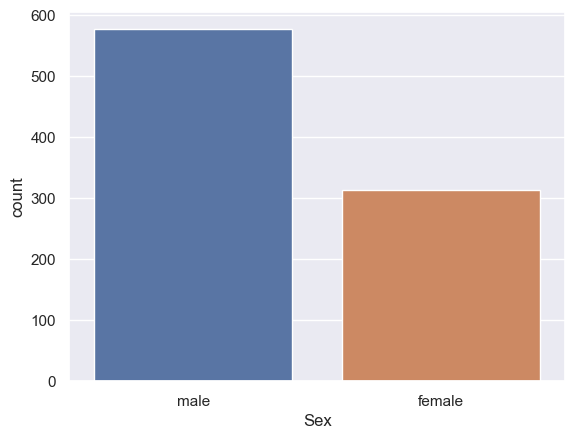

In [67]:
sns.countplot("Sex", data = titanic_data)

C:\Users\NavyaSravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

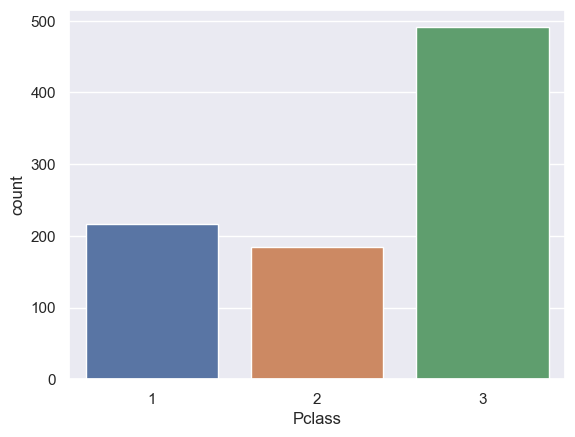

In [68]:
sns.countplot('Pclass', data=titanic_data)

C:\Users\NavyaSravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

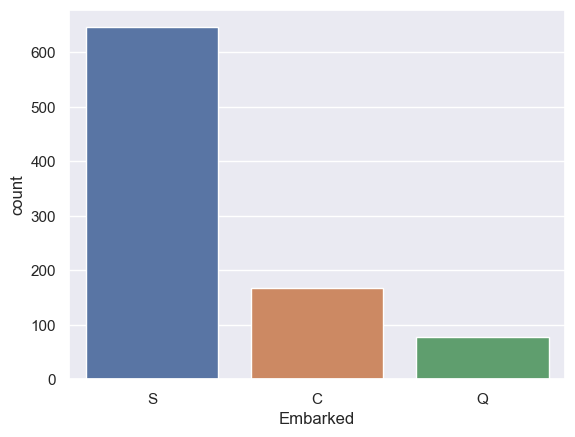

In [69]:
sns.countplot('Embarked', data = titanic_data)

## Checking correlation using heatmap

<AxesSubplot:>

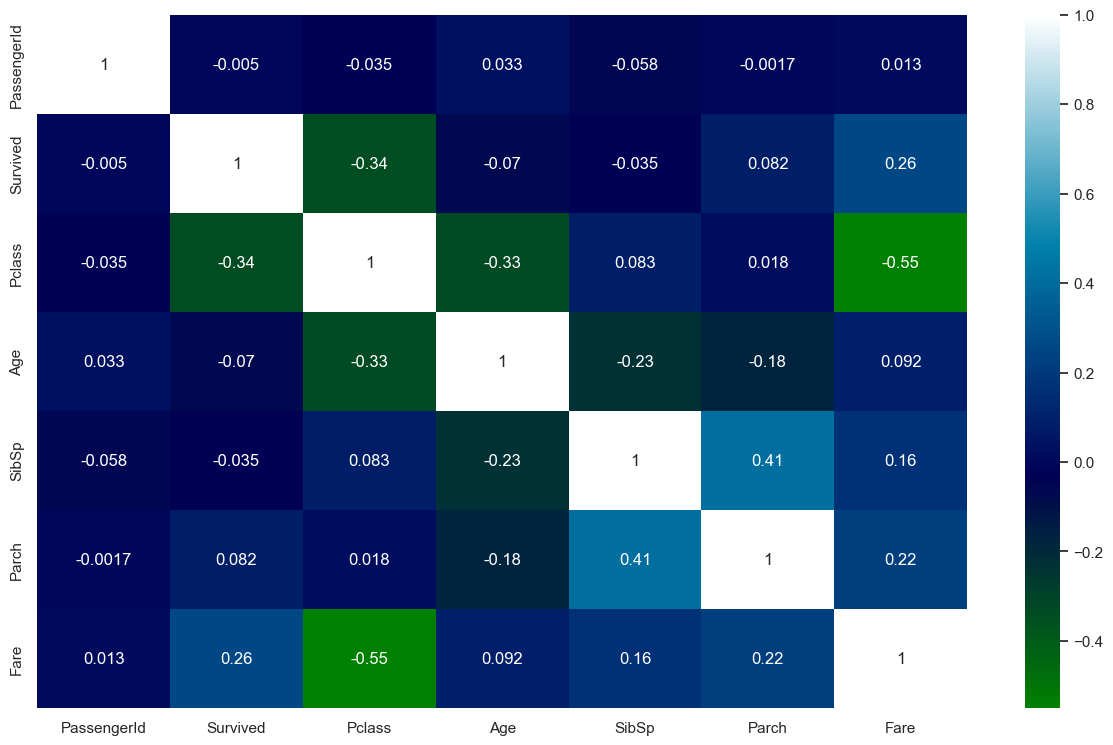

In [70]:
corr = titanic_data.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='ocean')

In [71]:
## Dropping unnecessary columns
titanic_data = titanic_data.drop(columns=['Name','Ticket'])
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [72]:
# Encoding the categorical values to numerical values
titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [73]:
titanic_data["Sex"] = titanic_data["Sex"].astype('category')
titanic_data["Sex"] = titanic_data["Sex"].cat.codes
titanic_data["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [74]:
titanic_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
titanic_data["Embarked"] = titanic_data["Embarked"].astype('category')
titanic_data["Embarked"] = titanic_data["Embarked"].cat.codes
titanic_data["Embarked"].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

## Splitting the data into train and test sets


In [76]:
x = titanic_data.drop(columns=['PassengerId',"Survived"],axis=1)
y = titanic_data['Survived']

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=46,test_size=0.3)

In [78]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(623, 7) (268, 7) (623,) (268,)


## Training a model

In [79]:
model = LogisticRegression()
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 50.6 KB


In [80]:
titanic_data.astype({'Age':'int', 'Fare':'int'}).dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex             int8
Age            int32
SibSp          int64
Parch          int64
Fare           int32
Embarked        int8
dtype: object

In [81]:
model.fit(x_train,y_train)

C:\Users\NavyaSravya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Accuracy,confusion_matrix and Classification_report

In [82]:
x_train_pred = model.predict(x_train)

In [83]:
training_data_accuracy = accuracy_score(y_train, x_train_pred)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  0.797752808988764


In [84]:
x_test_pred = model.predict(x_test)
training_data_accuracy = accuracy_score(y_test, x_test_pred)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  0.8283582089552238


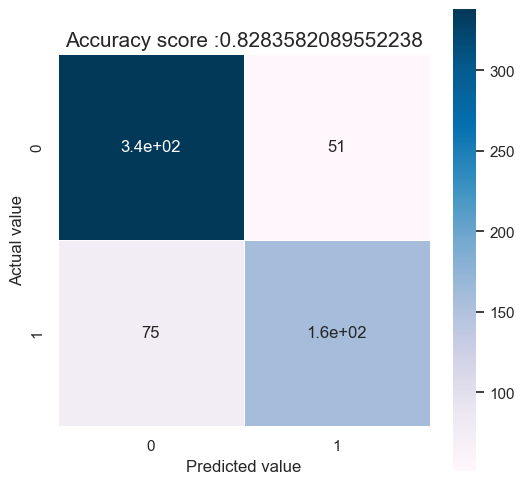

In [91]:
cm = confusion_matrix(y_train,Y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='PuBu')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
all_sample_title = 'Accuracy score :{0}'.format(model.score(x_test,y_test))
plt.title(all_sample_title,size=15)
plt.savefig("three.png")

In [87]:
y_pred = model.predict(x_test)
Y_pred = model.predict(x_train)
print("Classification report - \n",classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       160
           1       0.82      0.73      0.77       108

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [88]:
print("\nClassification report- \n",classification_report(y_train,Y_pred))


Classification report- 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       389
           1       0.76      0.68      0.72       234

    accuracy                           0.80       623
   macro avg       0.79      0.77      0.78       623
weighted avg       0.80      0.80      0.80       623

